Adding first center: (np.float64(0.5), np.float64(7.5))
Adding center: (np.float64(0.5), np.float64(5.5)), dist_sq: 4.0
Adding center: (np.float64(0.5), np.float64(3.5)), dist_sq: 4.0
Adding center: (np.float64(0.5), np.float64(1.5)), dist_sq: 4.0
Adding first center: (np.float64(4.5), np.float64(7.5))
Adding center: (np.float64(4.5), np.float64(5.5)), dist_sq: 4.0
Adding center: (np.float64(4.5), np.float64(3.5)), dist_sq: 4.0
Adding center: (np.float64(4.5), np.float64(1.5)), dist_sq: 4.0
Adding first center: (np.float64(8.5), np.float64(7.5))
Adding center: (np.float64(8.5), np.float64(5.5)), dist_sq: 4.0
Adding center: (np.float64(8.5), np.float64(3.5)), dist_sq: 4.0
Adding center: (np.float64(8.5), np.float64(1.5)), dist_sq: 4.0
Adding first center: (np.float64(1.5), np.float64(0.5))
Adding center: (np.float64(3.5), np.float64(0.5)), dist_sq: 4.0
Adding center: (np.float64(5.5), np.float64(0.5)), dist_sq: 4.0
Adding center: (np.float64(7.5), np.float64(0.5)), dist_sq: 4.0
Adding f

/tmp/ipython-input-91-957032351.py:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(lines))


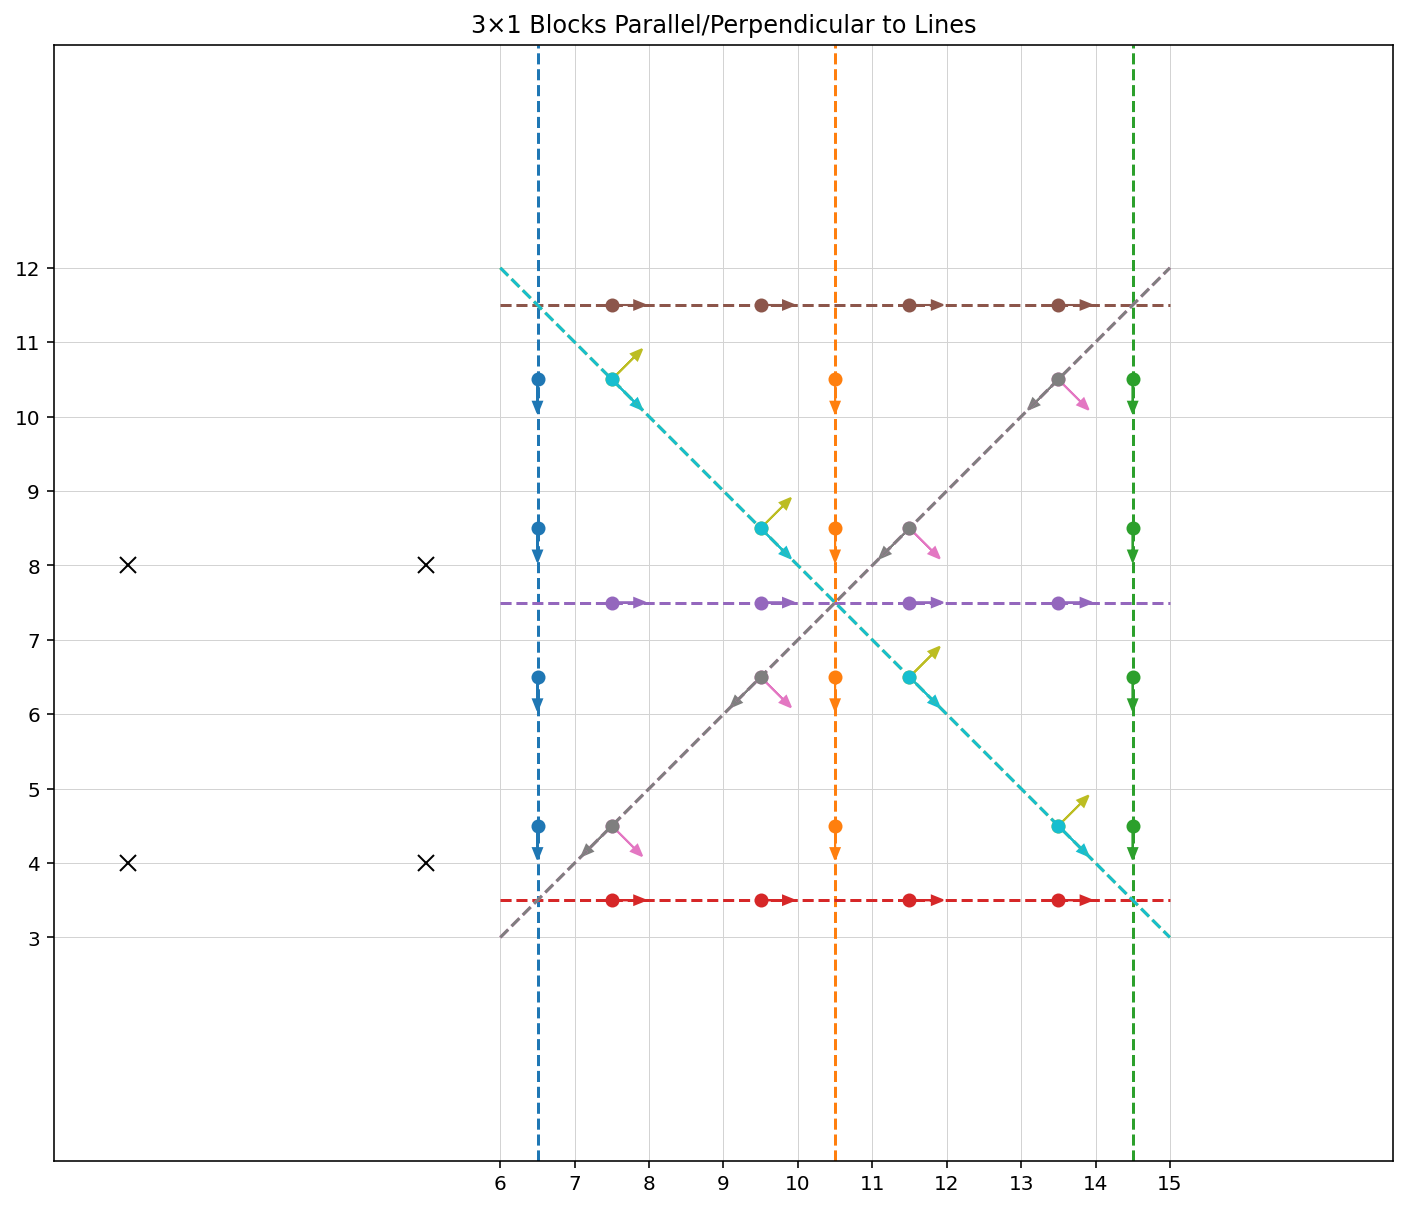

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

GRID_SIZE = 9
BLOCK_LENGTH = 3
h_offset = 6
v_offset = 3

# Lines: (a, b, c, label, orientation_mode)
lines = [
    (1, 0, -.5, f"x=-.5", 0, 1.5),                     # x=0 left edge
    (1, 0, -GRID_SIZE/2, f"x=-GRID_SIZE/2", 0, 1.5),                     # x=0 left edge
    (1, 0, -GRID_SIZE + .5 , f"x={GRID_SIZE}", 0, 1.5), # x=8 right edge

    (0, 1, -.5, f"y=0", 0, 1.5),                     # y=0 top edge
    (0, 1, -GRID_SIZE/2, f"y=--GRID_SIZE/2", 0, 1.5),                     # y=0 top edge

    (0, 1, -GRID_SIZE + .5, f"y={GRID_SIZE}", 0, 1.5), # y=8 bottom edge

    (1, -1, 0, "x = y", 1, 1.5),                   # diagonal x=y
    (1, -1, 0, "x = y", 0, 1.5),                   # diagonal x=y

    (1, 1, -GRID_SIZE, "x = -y + 8", 1, 1.5),     # diagonal x=-y+8
    (1, 1, -GRID_SIZE, "x = -y + 8", 0, 1.5)       # diagonal x=-y+8

    ]
def normalize(v):
    # Return unit step vector in integer components (dx, dy)
    sx, sy = np.sign(v[0]), np.sign(v[1])
    return (int(sx), int(sy))

def get_block_direction(a, b, mode):
    # line direction vector is (-b, a)
    line_dir = (-b, a)
    if mode == 1:  # parallel
        return normalize(line_dir)
    elif mode == 0:  # perpendicular
        return normalize((a, b))
    else:
        raise ValueError("mode must be 0 or 1")

def is_valid_block_center(cy, cx, dy, dx):
    # Given center (cy,cx) in grid coords, check block fits fully inside grid
    half = BLOCK_LENGTH // 2
    for i in range(-half, half+1):
        y = cy + i*dy
        x = cx + i*dx
        if not (0 <= y < GRID_SIZE and 0 <= x < GRID_SIZE):
            return False
    return True

def is_on_line(cx, cy, a, b, c, tol=0.5):
    # Check if (cx, cy) satisfies line equation within tolerance
    return abs(a*cx + b*cy + c) < tol

def sample_blocks_for_line(a, b, c, mode, min_dist_ax):
    dy, dx = get_block_direction(a, b, mode)
    centers = []

    # Candidate centers: can be half-integers in [0.5, GRID_SIZE - 0.5]
    candidate_positions = np.arange(0.5, GRID_SIZE, 1.0)

    potential_centers = []
    for cy in candidate_positions:
        for cx in candidate_positions:
            if not is_valid_block_center(cy, cx, dy, dx):
                continue
            if is_on_line(cx, cy, a, b, c):
                potential_centers.append( (cx, cy) )

    # Sort centers along the line direction
    # The direction vector is (dx, -dy) in this coordinate system
    sort_key = lambda p: p[0]*dx - p[1]*dy
    potential_centers.sort(key=sort_key)

    last_center = None
    for cx, cy in potential_centers:
        if last_center is None:
            centers.append( ((cx + h_offset, cy + v_offset), (dx, -dy)) )
            last_center = (cx,cy)
            print(f"Adding first center: {last_center}")
        else:
            dist_sq = (cx - last_center[0])**2 + (cy - last_center[1])**2
            if dist_sq >= min_dist_ax**2:
                centers.append( ((cx + h_offset, cy + v_offset), (dx, -dy)) )
                last_center = (cx,cy)
                print(f"Adding center: {last_center}, dist_sq: {dist_sq}")

    return centers

def visualize_lines_with_arrows(lines):
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.set_xlim(0, h_offset + GRID_SIZE + 3)
    ax.set_ylim(0, v_offset + GRID_SIZE + 3)
    ax.set_aspect('equal')
    ax.set_xticks(np.arange(h_offset, h_offset + GRID_SIZE + 1, 1))
    ax.set_yticks(np.arange(v_offset, v_offset + GRID_SIZE + 1, 1))
    ax.grid(True, which='both', color='lightgray', linewidth=0.5)
    ax.set_title("3×1 Blocks Parallel/Perpendicular to Lines")

    colors = plt.cm.get_cmap('tab10', len(lines))

    for i, (a, b, c, label, mode, max_dist) in enumerate(lines):
        centers = sample_blocks_for_line(a, b, c, mode, max_dist)

        # Plot line
        xs = np.linspace(0, GRID_SIZE, 500)
        if abs(b) > 1e-5:
            ys = (-a * xs - c) / b
            ax.plot(xs + h_offset, ys + v_offset, color=colors(i), linestyle='--',
                    label=f"Line: {label}, mode={'parallel' if mode==1 else 'perpendicular'}")
        else:
            x_line = -c / a
            ax.axvline(x=x_line + h_offset, color=colors(i), linestyle='--',
                       label=f"Line: {label}, mode={'parallel' if mode==1 else 'perpendicular'}")

        # Plot centers and arrows
        for (cx, cy), (dx, dy) in centers:
            ax.plot(cx, cy, 'o', color=colors(i))
            ax.arrow(cx, cy, 0.3 * dx, 0.3 * dy,
                     head_width=0.12, head_length=0.15,
                     fc=colors(i), ec=colors(i))

    # Add fource corners of the box
    box_corners = [
        (1,4),
        (5,4),
        (5,8),
        (1,8)
    ]
    for (cx, cy) in box_corners:
        ax.plot(cx, cy, 'x', color='black', markersize=8)

    # ax.legend(loc='upper right', fontsize=8)
    # plt.gca().invert_yaxis()
    plt.show()

# Run visualization
visualize_lines_with_arrows(lines)